<span style="font-size:30px;">**Webscrapping - Extracting Historical Stock Data**.</span>  
This Project is an ETL pipeline that extracts table from the web containing historical stock data to create a dashboard  
The stock data are extracted from TESLA and GAMESTOP using the ticker function from yahoo finance

In [44]:
#import the neccessary libraies
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<span style="font-size:30;">**Creating Dashboard for Tesla**.</span>  

<span style="font-size:16;">**Using the yahoo finance and the ticker function to create an object**.</span>  

In [45]:
#use the ticker function to create a ticker object
Tesla = yf.Ticker('TSLA')

#set the period to max to get all time stock data
tesla_data = Tesla.history(period = "max")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [46]:
#create an index for the dataframe
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [47]:
#check for datatpes of each column
tesla_data.dtypes

Date            datetime64[ns, America/New_York]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                             float64
dtype: object

In [48]:
#check for datatpes of each column
tesla_data.dtypes

Date            datetime64[ns, America/New_York]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                             float64
dtype: object

<span style="font-size:20;">**Extracting Tesla revenue data using beautiful soup**</span> 

In [49]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

#Webscrapping to extract Tesla revevenue data
html_data = requests.get(url).text

#parse html data using beautiful soup
soup = BeautifulSoup(html_data, 'html.parser')

<span style="font-size:16;">**Create an empty dataframe with columns Date and Revenue**.</span> 

In [50]:
#extract tesla revenue table from the html_data and store in a Dataframe
tesla_revenue = pd.DataFrame(columns = ['Date','Revenue'])
tesla_revenue

,Date,Revenue


<span style="font-size:16;">**Extract the revenue table**.</span> 

In [51]:
#extract all table rows from the body of the soup object using a for loop
for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text
            
    #create another dataframe that contains a single row with values provided by the variables date and revenue.
    new_tesla_data = pd.DataFrame({'Date':[date], 'Revenue':[revenue]})
    
    #concatenate the new dataframe created above with the existing dataframe tesla revenue
    tesla_revenue = pd.concat([tesla_revenue,new_tesla_data], ignore_index=True)

tesla_revenue.head(8)

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"
5,2016,"$7,000"
6,2015,"$4,046"
7,2014,"$3,198"


<span style="font-size:24;">**Data Transformation**.</span> 

In [52]:
#remove comma and dollar sign from the revenue column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.head(8)

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198


In [53]:
#remove null values
tesla_revenue.dropna(inplace=True)

#check to see if there are null values still availabe. NB: check for all but only printed 8 columns
tesla_revenue.isnull().head(8)

,Date,Revenue
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False


<span style="font-size:24;">**Visualization and creating Dashboard**.</span> 

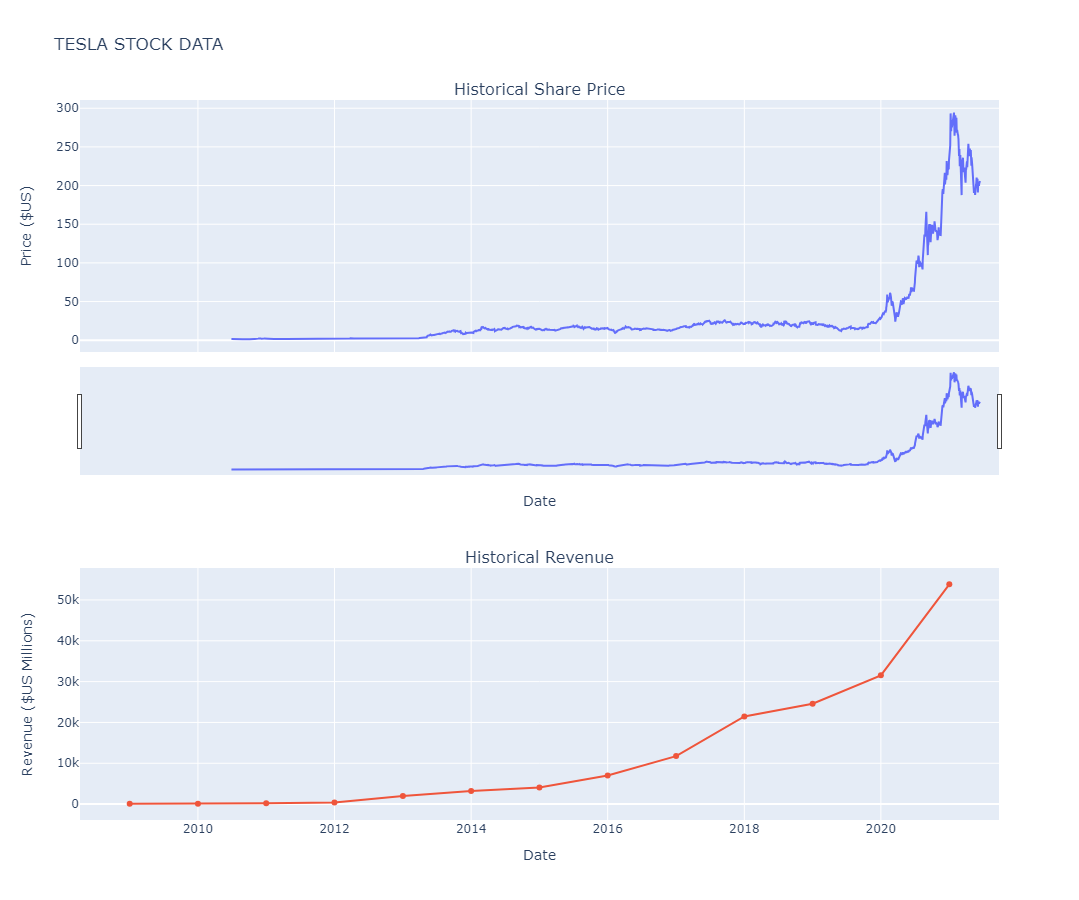

In [54]:
#creating a function that takes the stock data and revenue data to create a dashboard

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,height=900,title=stock,xaxis_rangeslider_visible=True)
        
    fig.show()
        
make_graph(tesla_data, tesla_revenue, 'TESLA STOCK DATA')

<span style="font-size:20px;">**Analysis for Tesla Dashboard**.</span>  
Tesla's share price witnessed a prolonged phase at its minimum average of 1.5 USD from 2010 to 2013, remaining below the 50 USD mark until February 2020 when a notable breakthrough occurred. The share price experienced a substantial surge, reaching its maximum at 294 USD in February 2021, reflecting a remarkable upward trajectory.

In terms of revenue, Tesla maintained consistency from 2005 to 2012, followed by a linear increase from 400K to 7 million USD within four years, concluding at the end of 2016. The company achieved its highest recorded revenue at 53 million USD in January 2020, marking a significant milestone in its financial performance. This noteworthy accomplishment positions Tesla as a key player in the market, with both its share price and revenue demonstrating substantial growth over the years.


<span style="font-size:24px;">**Creating Dashboard for Gamestop**.</span>  

In [55]:
#use the ticker function to create a ticker object
GameStop = yf.Ticker('GME')

#set the period to max to get all time stock data
Gme_data = GameStop.history(period = "max")
Gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [56]:
#create an index for the dataframe
Gme_data.reset_index(inplace=True)
Gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [57]:
#check for datatpes of each column
tesla_data.dtypes

Date            datetime64[ns, America/New_York]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                             float64
dtype: object

In [58]:
#check for num of rows and columns
tesla_data.shape

(3420, 8)

<span style="font-size:20;">**Extracting GameStop revenue data using html reader**</span> 

In [59]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

#Webscrapping to extract Tesla revevenue data
html_data = requests.get(url).text

#pandas library read_html to extract tables from html contents
gme_revenue = pd.read_html(html_data)

#The html reader stores the contents as a list of tables
gme_revenue

[    GameStop Annual Revenue(Millions of US $)  \
 0                                        2020   
 1                                        2019   
 2                                        2018   
 3                                        2017   
 4                                        2016   
 5                                        2015   
 6                                        2014   
 7                                        2013   
 8                                        2012   
 9                                        2011   
 10                                       2010   
 11                                       2009   
 12                                       2008   
 13                                       2007   
 14                                       2006   
 15                                       2005   
 
    GameStop Annual Revenue(Millions of US $).1  
 0                                       $6,466  
 1                                       $8,285 

In [60]:
# We then select the first table in the list to analyse
gme_revenue[0]

,GameStop Annual Revenue(Millions of US $),GameStop Annual Revenue(Millions of US $).1
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"
5,2015,"$9,296"
6,2014,"$9,040"
7,2013,"$8,887"
8,2012,"$9,551"
9,2011,"$9,474"


<span style="font-size:24;">**Data Transformation**.</span> 

In [61]:
#remane column names to prefered ones
gme_revenue = gme_revenue[0].rename(columns = {'GameStop Annual Revenue(Millions of US $)':'Date','GameStop Annual Revenue(Millions of US $).1':'Revenue'})
gme_revenue

,Date,Revenue
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"
5,2015,"$9,296"
6,2014,"$9,040"
7,2013,"$8,887"
8,2012,"$9,551"
9,2011,"$9,474"


In [62]:
#remove dollar sign and comma from the revenue column
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('[,$]','', regex=True)
gme_revenue

,Date,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364
5,2015,9296
6,2014,9040
7,2013,8887
8,2012,9551
9,2011,9474


In [63]:
#drop null values
gme_revenue.dropna(inplace=True)

#check to see if there are null values
gme_revenue.isnull().head(7)

,Date,Revenue
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False


In [64]:
#create a function that takes the stock data and revenue data to create a dashboard

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,height=900,title=stock,xaxis_rangeslider_visible=True)
        
    fig.show()
        
make_graph(Gme_data, gme_revenue, 'GAMESTOP STOCK DATA')

TypeError: Invalid comparison between dtype=int64 and str

In [65]:
#check for datatype of gme_revenue
gme_revenue.dtypes

Date        int64
Revenue    object
dtype: object

In [66]:
#change datatype of date to string so it can be used for the graph
gme_revenue['Date'] = gme_revenue['Date'].astype(str)

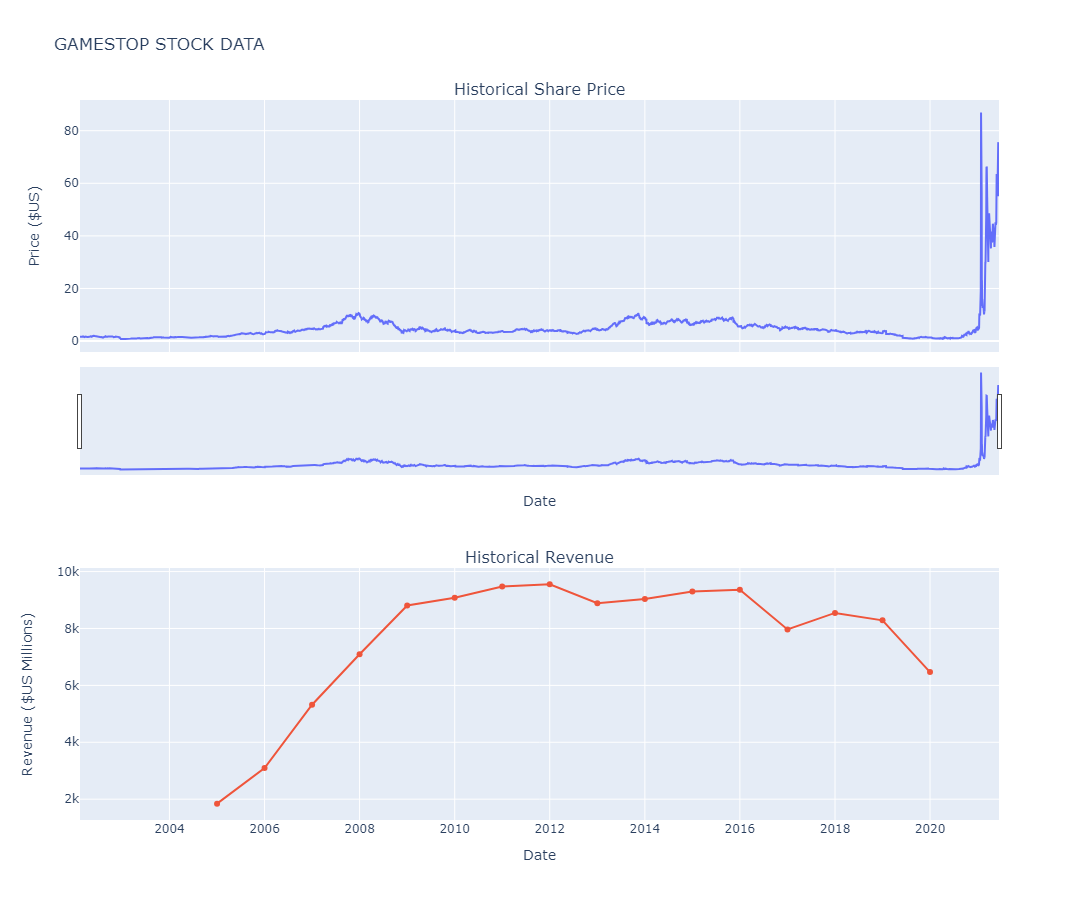

In [67]:
#create dashboard for Gamestop
make_graph(Gme_data, gme_revenue, 'GAMESTOP STOCK DATA')

<span style="font-size:20;">**Analysis of GameStop Dashboard**</span>  
The Share price of Gamestop remained below 20 USD for almost two decades, spanning from 2002 to 2020, with its highest value of 10.6 USD recorded in December 2007 during that period. However, a remarkable shift occurred in January 2021, witnessing a substantial surge in the Share price from 4.3 USD on January 4th to an astonishing 86.87 USD by January 27th. This unprecedented increase prompts the need for further investigation to uncover the underlying factors contributing to such a drastic change.

In terms of revenue, Gamestop experienced a consistent linear rise from 2005 to 2012, maintaining an average revenue above 80 million USD. However, this positive trend took a turn in 2020, as the revenue slightly dropped to just above 60 million USD. The declining revenue in 2020 raises questions and suggests a potential shift in the company's financial performance during that period. Further analysis and exploration are required to understand the causes behind this deviation from the established revenue trend.